<a href="https://colab.research.google.com/github/Gabuni19/GabUni--Codigos-cpp/blob/main/Inteligencia_Artificial_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion Lineal


In [ ]:
import numpy as np

Funcion Hipotesis:
$$h_\theta(x)= \theta_0+\theta_1x $$

In [ ]:
def FuncionHipotesis(theta0,theta1):
  """Funcion que retorna una funcion lambda tal que
 - Si le pasa un valor numerico -> return  h(valor)  con esos parametros (theta0,theta1)
 - Si le pasas un arreglo numpy -> return np.array([h(valor1),h(valor2),...,h(valorn)])

  Parametros Posicionales
  [+] theta0 -- float
  [+] theta1 -- float
  """
  return lambda x: theta0 + theta1*x

In [ ]:
#Pasas los parametros (theta0,theta1) a la funcion H
H = FuncionHipotesis(4,1)
# Si le pasas un valor
valor = 2
print(f"H({valor}) = {H(valor)}")
# Si le pasas un arreglo numpy
valor = np.array([1,2,3])
print(f"H({valor}) = {H(valor)}")

H(2) = 6
H([1 2 3]) = [5 6 7]


Funcion de Coste:
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0+\theta_1(x^{(i)}) - y^{(i)})^2$$


In [ ]:
def FuncionCoste(x,y):
  """Funcion que retorna una funcion de coste lambda que
    mide el error cuadratico medio (MSE) de cierto conjunto
    de datos (x,y) con respecto a cierto modelo que lo representa
    los parametros (theta0,theta1) que se debe pasar a esta
    lambda.

    Parametros Posicionales
    [+] x -- Conjunto de datos de entrada - tipo:numpy
    [+] y -- Conjunto de targets - tipo:numpy

    Nota: El arreglo x e y deben tener la misma dimension
  """
  m = len(x)
  return lambda theta0,theta1 : 1/(2*(m)) * np.sum( (theta0 + theta1*x - y )**2)

In [ ]:
x = np.array([1,2,3])
y = np.array([1,2,3])
x**2

array([1, 4, 9])

In [ ]:
J = FuncionCoste(x,y)
J(2,3)

3.0

Derivada respecto de theta0 y theta1:
$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})
$$
$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})x^{(i)}
$$


In [ ]:
def derivada_theta0(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum(theta0+theta1*x-y)

def derivada_theta1(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum((theta0+theta1*x-y)*x)


In [ ]:
D_theta0=derivada_theta0
D_theta1=derivada_theta1

Funcion de Optimizacion:
$$\theta_0 =\theta_0 - \frac{α}{m}\sum_{i=1}^{m} (\theta_0+\theta_1x^{(i)} - y^{(i)})$$
$$\theta_1 =\theta_1 -\frac{α}{m}\sum_{i=1}^{m} (\theta_0+\theta_1x^{(i)} - y^{(i)})x^{(i)}$$

Implementacion de Regresion Lineal

In [ ]:
#Definimos las funciones auxiliares
def FuncionHipotesis(theta0,theta1):
  """Funcion que retorna una funcion lambda tal que
 - Si le pasa un valor numerico -> return  h(valor)  con esos parametros (theta0,theta1)
 - Si le pasas un arreglo numpy -> return np.array([h(valor1),h(valor2),...,h(valorn)])

  Parametros Posicionales
  [+] theta0 -- float
  [+] theta1 -- float
  """
  return lambda x: theta0 + theta1*x
def FuncionCoste(x,y):
  """Funcion que retorna una funcion de coste lambda que
    mide el error cuadratico medio (MSE) de cierto conjunto
    de datos (x,y) con respecto a cierto modelo que lo representa
    los parametros (theta0,theta1) que se debe pasar a esta
    lambda.

    Parametros Posicionales
    [+] x -- Conjunto de datos de entrada - tipo:numpy
    [+] y -- Conjunto de targets - tipo:numpy

    Nota: El arreglo x e y deben tener la misma dimension
  """
  m = len(x)
  return lambda theta0,theta1 : 1/(2*(m)) * np.sum( theta0 + theta1*x - y)

def derivada_theta0(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum(theta0+theta1*x-y)

def derivada_theta1(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum((theta0+theta1*x-y)*x)

In [ ]:
import numpy as np

# Definimos nuestro conjunto de datos de entrenamiento
x = np.array([1,3,5,5,6,7,8])
y = np.array([1,2,3,6,7,8,9])

# Lista de valores de los parametros
parametros = {
    'theta0':[],
    'theta1':[],
    'J(theta)':[]
}

def RegresionLineal(x,y, iteraciones = 10000 , alpha = 0.01, epsilon = 0.00001):
  # Atribuimos las funciones
  J = FuncionCoste(x,y)
  D0 = derivada_theta0(x,y)
  D1 = derivada_theta1(x,y)

  # Se escoge aleatoriamente un theta0 y theta1
  theta0 = np.random.randint(-5,5) # [-5,5>
  theta1 = np.random.randint(-5,5) # [-5,5>

  parametros['theta0'].append(theta0)
  parametros['theta1'].append(theta1)
  parametros['J(theta)'].append(J(theta0,theta1))
  print("Regresion Lineal :")
  print(f" theta0 = {theta0:.5f} , theta1={theta1:.5f}")

  i=0

  while i<=iteraciones:
    theta0_actual = theta0 # Almacenamos el theta0 actual
    theta1_actual = theta1 # Almacenamos el theta1 actual


    theta0 = theta0 - alpha * D0(theta0,theta1)
    theta1 = theta1 - alpha * D1(theta0,theta1)
    print(f" theta0 = {theta0:.5f} , theta1={theta1:.5f}")
    parametros['theta0'].append(theta0)
    parametros['theta1'].append(theta1)
    parametros['J(theta)'].append(J(theta0,theta1))

    if(np.abs(theta0_actual-theta0)<epsilon and np.abs(theta1_actual-theta1)<epsilon):
      print("Convergence FOUND!")
      print("Theta0: " + str(theta0))
      print("Theta1: " + str(theta1))
      print(str(i) + " iterations")
      print("Cost: " + str(J(theta0,theta1)))
      return theta0,theta1
    i+=1

  print(str(i) + " iterations")
  print(" Convergence No FOUND!")
  return theta0,theta1


In [ ]:
theta0,theta1 =RegresionLineal(x,y)

Regresion Lineal :
 theta0 = 2.00000 , theta1=1.00000
 theta0 = 1.98143 , theta1=0.91950
 theta0 = 1.96707 , theta1=0.86375
 theta0 = 1.95564 , theta1=0.82522
 theta0 = 1.94625 , theta1=0.79866
 theta0 = 1.93828 , theta1=0.78043
 theta0 = 1.93131 , theta1=0.76800
 theta0 = 1.92502 , theta1=0.75959
 theta0 = 1.91922 , theta1=0.75398
 theta0 = 1.91376 , theta1=0.75032
 theta0 = 1.90853 , theta1=0.74801
 theta0 = 1.90348 , theta1=0.74664
 theta0 = 1.89854 , theta1=0.74593
 theta0 = 1.89368 , theta1=0.74568
 theta0 = 1.88889 , theta1=0.74574
 theta0 = 1.88414 , theta1=0.74602
 theta0 = 1.87943 , theta1=0.74645
 theta0 = 1.87474 , theta1=0.74699
 theta0 = 1.87007 , theta1=0.74760
 theta0 = 1.86542 , theta1=0.74826
 theta0 = 1.86078 , theta1=0.74895
 theta0 = 1.85616 , theta1=0.74967
 theta0 = 1.85154 , theta1=0.75041
 theta0 = 1.84693 , theta1=0.75115
 theta0 = 1.84233 , theta1=0.75191
 theta0 = 1.83774 , theta1=0.75266
 theta0 = 1.83316 , theta1=0.75342
 theta0 = 1.82859 , theta1=0.75419
 

Grafico

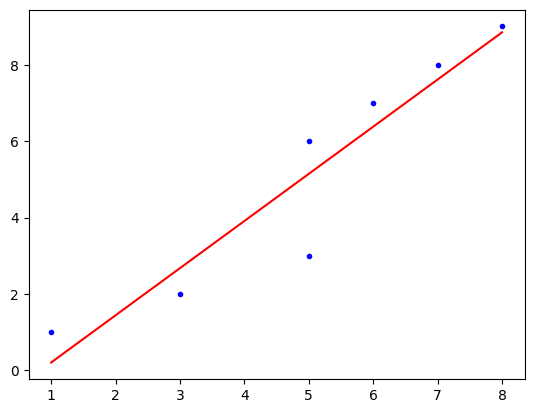

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,theta1*x+theta0,'r-')
plt.plot(x,y,"b.")
plt.show()

**Visualizacion del conjunto de Datos** - Pandas

In [ ]:
import pandas as pd

In [ ]:
data = {
    'Valores_x': x.flatten(),
    'Valore_y': y.flatten()
}

In [ ]:
df = pd.DataFrame(data)
df

,Valores_x,Valore_y
0,1,1
1,3,2
2,5,3
3,5,6
4,6,7
5,7,8
6,8,9


In [ ]:
df_parametros = pd.DataFrame(parametros)
df_parametros

,theta0,theta1,J(theta)
0,2.000000,1.000000,2.357143
1,1.981429,0.919500,1.771541
2,1.967068,0.863753,1.486643
3,1.955638,0.825222,1.347344
4,1.946249,0.798665,1.278573
...,...,...,...
3860,-1.027318,1.234236,0.498203
3861,-1.027328,1.234238,0.498202
3862,-1.027338,1.234239,0.498202
3863,-1.027348,1.234241,0.498202


Funcion de Coste

In [ ]:
import numpy as np

grafica = {
    "thetha0":[],
    "thetha1":[] ,
    "J(theta)":[]
}

def FuncionCoste(x,y):
  """Funcion que retorna una funcion de coste lambda que
    mide el error cuadratico medio (MSE) de cierto conjunto
    de datos (x,y) con respecto a cierto modelo que lo representa
    los parametros (theta0,theta1) que se debe pasar a esta
    lambda.

    Parametros Posicionales
    [+] x -- Conjunto de datos de entrada - tipo:numpy
    [+] y -- Conjunto de targets - tipo:numpy

    Nota: El arreglo x e y deben tener la misma dimension
  """
  m = len(x)
  return lambda theta0,theta1 : 1/(2*(m)) * np.sum( (theta0 + theta1*x - y)**2)

J = FuncionCoste(x,y)

# Crea una cuadrícula de valores para theta0 y theta1
theta0_values = np.linspace(-5, 5, 100)
theta1_values = np.linspace(-5, 5, 100)


# Evaluamos la Función de Costo en cada par de parámetros
for theta0 in theta0_values:
    for theta1 in theta1_values:
        costo = J(theta0, theta1)
        grafica["thetha0"].append(theta0)
        grafica["thetha1"].append(theta1)
        grafica["J(theta)"].append(costo)



In [ ]:
df_FuncionCoste = pd.DataFrame(grafica)
df_FuncionCoste

,thetha0,thetha1,J(theta)
0,-5.0,-5.00000,712.428571
1,-5.0,-4.89899,691.772807
2,-5.0,-4.79798,671.421677
3,-5.0,-4.69697,651.375180
4,-5.0,-4.59596,631.633317
...,...,...,...
9995,5.0,4.59596,288.689594
9996,5.0,4.69697,302.024531
9997,5.0,4.79798,315.664101
9998,5.0,4.89899,329.608305


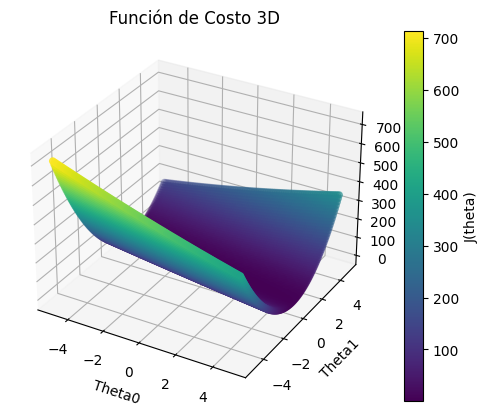

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

# Crea una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Asigna colores en función de J(theta) para visualizar la superficie
sc = ax.scatter(grafica["thetha0"], grafica["thetha1"], grafica["J(theta)"], c=grafica["J(theta)"], cmap='viridis', marker='o')
fig.colorbar(sc, ax=ax, label='J(theta)')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Costo')
ax.set_title('Función de Costo 3D')

# Agrega los puntos de convergencia
convergencia_x = df_parametros['theta0']
convergencia_y = df_parametros['theta1']
convergencia_J = df_parametros['J(theta)']
ax.scatter(convergencia_x, convergencia_y, convergencia_J, c='red', marker='x', s=50, label='Convergencia')

plt.show()




In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asigna colores en función de J(theta) para visualizar la superficie
fig = go.Figure(data=[go.Scatter3d(
    x=grafica["thetha0"],
    y=grafica["thetha1"],
    z=grafica["J(theta)"],
    mode='markers',
    marker=dict(
        size=5,
        color=grafica["J(theta)"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Agrega los puntos de convergencia
fig.add_trace(go.Scatter3d(
    x=df_parametros['theta0'],
    y=df_parametros['theta1'],
    z=df_parametros['J(theta)'],
    mode='markers',
    marker=dict(
        color='red',
        size=5,
        symbol='cross'
    ),
    name='Convergencia'
))

fig.update_layout(scene = dict(
                    xaxis_title='Theta0',
                    yaxis_title='Theta1',
                    zaxis_title='Costo'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()




## Contruccion del modelo - **sklearn**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()
#Debemos pasar los valores de x como matriz columna .reshape(-1,1) : una columna y varias filas
modelo.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
modelo.intercept_

-1.0336134453781503

In [ ]:
modelo.coef_

array([1.23529412])

In [ ]:
modelo.predict(x.min().reshape(-1,1))

array([0.20168067])

In [ ]:
modelo.predict(x.max().reshape(-1,1))

array([8.8487395])

In [ ]:
x_min_max = np.array([
                      [x.min()],
                      [x.max()]
                      ])
y_predict = modelo.predict(x_min_max)

Visualizacion del modelo

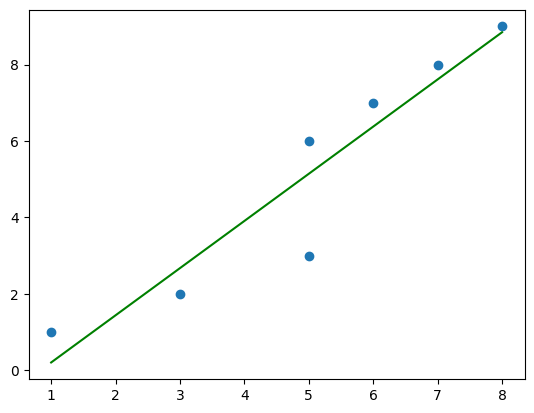

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_min_max,y_predict,"g-")
plt.scatter(x,y)
plt.show()

Prediccion de nuevos datos

In [ ]:
new_Data=np.array([
    [4],
    [5],
    [8],
    [1.4],
    [1.7]
    ])

In [ ]:
y_predict=modelo.predict(new_Data)
print(y_predict)

[3.90756303 5.14285714 8.8487395  0.69579832 1.06638655]


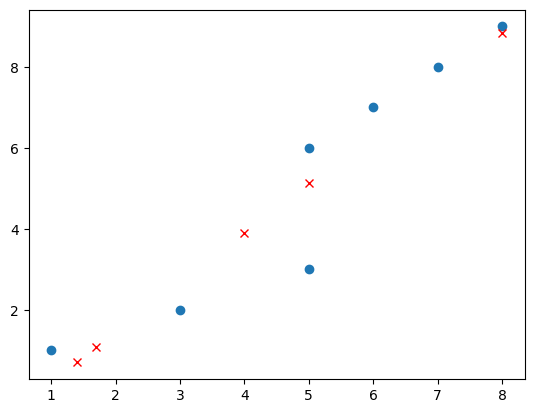

In [ ]:
plt.scatter(x,y)
plt.plot(new_Data,y_predict,"rx")

plt.show()